#  Data Exploration - Traffic Dataset

In [2]:
# Import Libs and Modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

sns.set_palette("GnBu_d")
sns.set_style("whitegrid")


In [3]:
# Load the Datasets

traffic_train = pd.read_csv('../../datasets/training_data.csv', encoding='latin1')
traffic_test = pd.read_csv('../../datasets/test_data.csv', encoding='latin1')

# Change record_date
for df in [traffic_train, traffic_test]:
    df['record_date'] = pd.to_datetime(df['record_date'])
    df['hour'] = df['record_date'].dt.hour
    df['day_of_week'] = df['record_date'].dt.dayofweek
    df['month'] = df['record_date'].dt.month


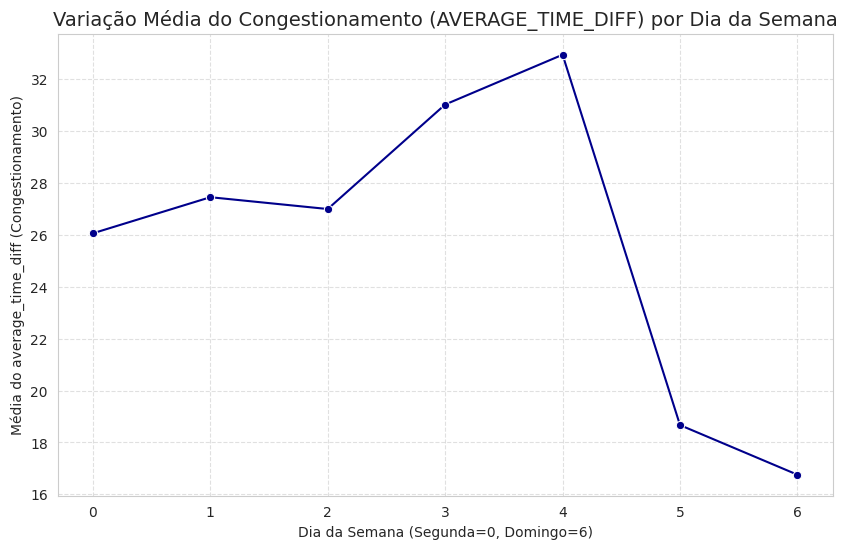

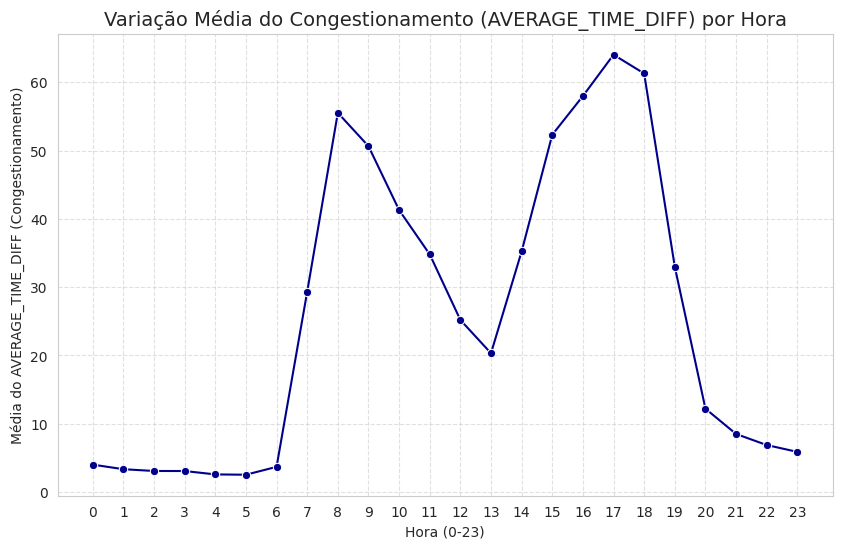

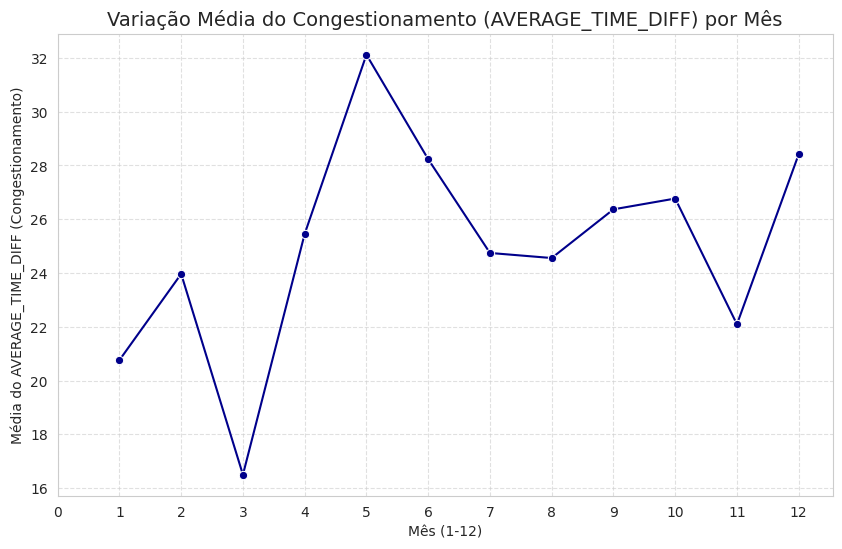

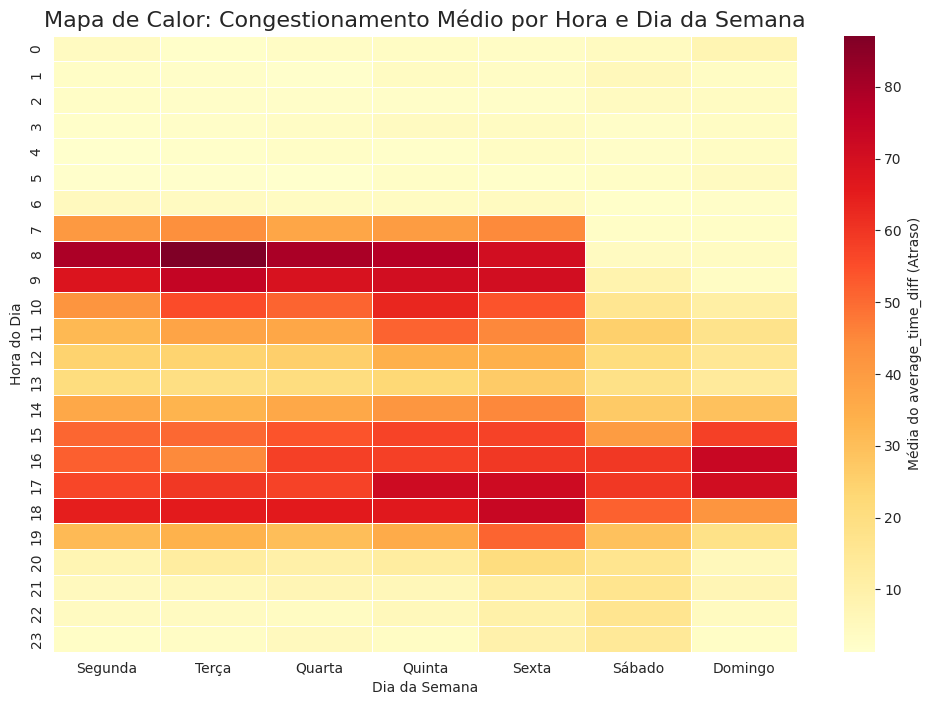

In [4]:
# Initial Overview
traffic_train.head()

hourly_traffic = traffic_train.groupby('day_of_week')['AVERAGE_TIME_DIFF'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='day_of_week', y='AVERAGE_TIME_DIFF', data=hourly_traffic, marker='o', color='darkblue')

plt.title('Variação Média do Congestionamento (AVERAGE_TIME_DIFF) por Dia da Semana', fontsize=14)
plt.xlabel('Dia da Semana (Segunda=0, Domingo=6)')
plt.ylabel('Média do average_time_diff (Congestionamento)')
plt.xticks(range(0, 7, 1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

hourly_traffic = traffic_train.groupby('hour')['AVERAGE_TIME_DIFF'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='AVERAGE_TIME_DIFF', data=hourly_traffic, marker='o', color='darkblue')

plt.title('Variação Média do Congestionamento (AVERAGE_TIME_DIFF) por Hora', fontsize=14)
plt.xlabel('Hora (0-23)')
plt.ylabel('Média do AVERAGE_TIME_DIFF (Congestionamento)')
plt.xticks(range(0, 24, 1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

hourly_traffic = traffic_train.groupby('month')['AVERAGE_TIME_DIFF'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='AVERAGE_TIME_DIFF', data=hourly_traffic, marker='o', color='darkblue')

plt.title('Variação Média do Congestionamento (AVERAGE_TIME_DIFF) por Mês', fontsize=14)
plt.xlabel('Mês (1-12)')
plt.ylabel('Média do AVERAGE_TIME_DIFF (Congestionamento)')
plt.xticks(range(0, 13, 1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

day_map = {0: 'Segunda', 1: 'Terça', 2: 'Quarta', 3: 'Quinta', 4: 'Sexta', 5: 'Sábado', 6: 'Domingo'}
traffic_train['day_name'] = traffic_train['day_of_week'].map(day_map)

heatmap_data = traffic_train.pivot_table(
    values='AVERAGE_TIME_DIFF', 
    index='hour',
    columns='day_name',
    aggfunc='mean'
)

day_order = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']
heatmap_data = heatmap_data[day_order]

plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    cmap="YlOrRd", 
    annot=False,    
    fmt=".1f",
    linewidths=.5,
    cbar_kws={'label': 'Média do average_time_diff (Atraso)'}
)
plt.title('Mapa de Calor: Congestionamento Médio por Hora e Dia da Semana', fontsize=16)
plt.ylabel('Hora do Dia')
plt.xlabel('Dia da Semana')
plt.show()



/tmp/ipykernel_4203/2664710739.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='LUMINOSITY', y='AVERAGE_TIME_DIFF', data=traffic_train, palette="Pastel1")


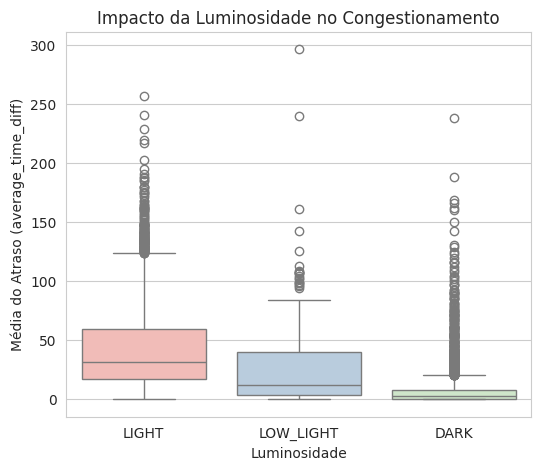

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   city_name                6812 non-null   object        
 1   record_date              6812 non-null   datetime64[ns]
 2   AVERAGE_SPEED_DIFF       4612 non-null   object        
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64       
 4   AVERAGE_TIME_DIFF        6812 non-null   float64       
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64       
 6   LUMINOSITY               6812 non-null   object        
 7   AVERAGE_TEMPERATURE      6812 non-null   float64       
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64       
 9   AVERAGE_HUMIDITY         6812 non-null   float64       
 10  AVERAGE_WIND_SPEED       6812 non-null   float64       
 11  AVERAGE_CLOUDINESS       4130 non-null   object        
 12  AVERAGE_PRECIPITATION    6812 non-

,record_date,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_PRECIPITATION,hour,day_of_week,month
count,6812,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.0,6812.000000,6812.000000,6812.000000
mean,2019-02-24 04:00:06.870228992,40.661010,25.637111,81.143952,16.193482,1017.388139,80.084190,3.058573,0.0,11.534498,3.022607,7.088961
min,2018-07-24 15:00:00,30.500000,0.000000,46.400000,0.000000,985.000000,14.000000,0.000000,0.0,0.000000,0.000000,1.000000
25%,2018-10-20 22:30:00,37.600000,2.275000,75.400000,13.000000,1015.000000,69.750000,1.000000,0.0,6.000000,1.000000,5.000000
50%,2019-02-20 08:30:00,40.700000,12.200000,82.400000,16.000000,1017.000000,83.000000,3.000000,0.0,12.000000,3.000000,8.000000
75%,2019-06-22 14:15:00,43.500000,36.200000,87.400000,19.000000,1021.000000,93.000000,4.000000,0.0,18.000000,5.000000,9.000000
max,2019-09-30 23:00:00,55.900000,296.500000,112.000000,35.000000,1033.000000,100.000000,14.000000,0.0,23.000000,6.000000,12.000000
std,NaN,4.119023,33.510507,8.294401,5.163492,5.751061,18.238863,2.138421,0.0,6.939520,2.009905,2.947594


In [ ]:
# Gráfico LUMINUSIDADE

plt.figure(figsize=(6, 5))
sns.boxplot(x='LUMINOSITY', y='AVERAGE_TIME_DIFF', data=traffic_train, palette="Pastel1")
plt.title('Impacto da Luminosidade no Congestionamento')
plt.xlabel('Luminosidade')
plt.ylabel('Média do Atraso (average_time_diff)')
plt.show()

# Gráfico TEMPERATURA

#bins = [-np.inf, 10, 18, 25, np.inf]
#labels = ['1. Frio (< 10°C)', '2. Ameno (10-18°C)', '3. Confortável (18-25°C)', '4. Quente (> 25°C)']

# Criar a nova coluna categórica
#traffic_train['temp_group'] = pd.cut(
 #   traffic_train['AVERAGE_TEMPERATURE'],
 #   bins=bins,
 #   labels=labels,
 #   right=False,  # Incluir o limite inferior (e.g., 10 <= x < 18)
 #   include_lowest=True
#)

#traffic_train = traffic_train.dropna(subset=['temp_group'])

#plt.figure(figsize=(12, 5))
#sns.boxplot(x='temp_group', y='AVERAGE_TIME_DIFF', data=traffic_train, palette="Pastel1")
#plt.title('Impacto da Temperatura no Congestionamento')
#plt.xlabel('Temperatura')
#plt.ylabel('Média do Atraso (average_time_diff)')
#plt.show()


traffic_train.info()
traffic_train.describe()



In [6]:
traffic_train.isna().sum()

city_name                     0
record_date                   0
AVERAGE_SPEED_DIFF         2200
AVERAGE_FREE_FLOW_SPEED       0
AVERAGE_TIME_DIFF             0
AVERAGE_FREE_FLOW_TIME        0
LUMINOSITY                    0
AVERAGE_TEMPERATURE           0
AVERAGE_ATMOSP_PRESSURE       0
AVERAGE_HUMIDITY              0
AVERAGE_WIND_SPEED            0
AVERAGE_CLOUDINESS         2682
AVERAGE_PRECIPITATION         0
AVERAGE_RAIN               6249
hour                          0
day_of_week                   0
month                         0
day_name                      0
dtype: int64

<Axes: >

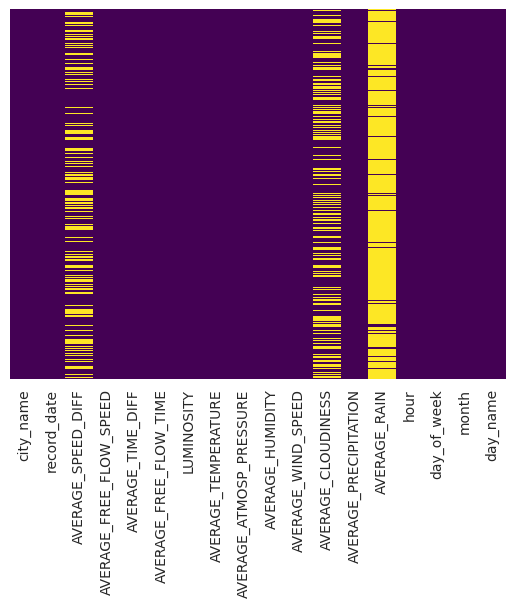

In [7]:
sns.heatmap(traffic_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [8]:
# Change Date Column
traffic_train['record_date'] = pd.to_datetime(traffic_train['record_date'])
traffic_train.head()

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN,hour,day_of_week,month,day_name
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,0.0,NaN,7,3,8,Quinta
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0.0,NaN,14,4,8,Sexta
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,0.0,NaN,16,6,9,Domingo
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0.0,NaN,11,1,2,Terça
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,0.0,NaN,12,3,6,Quinta


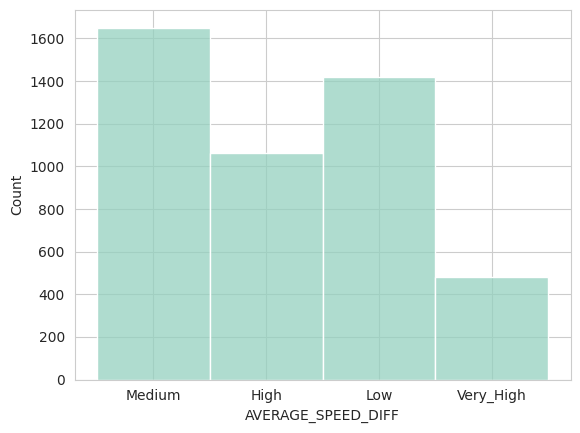

In [9]:
sns.histplot(traffic_train['AVERAGE_SPEED_DIFF'], bins=10)
plt.show()

<Axes: >

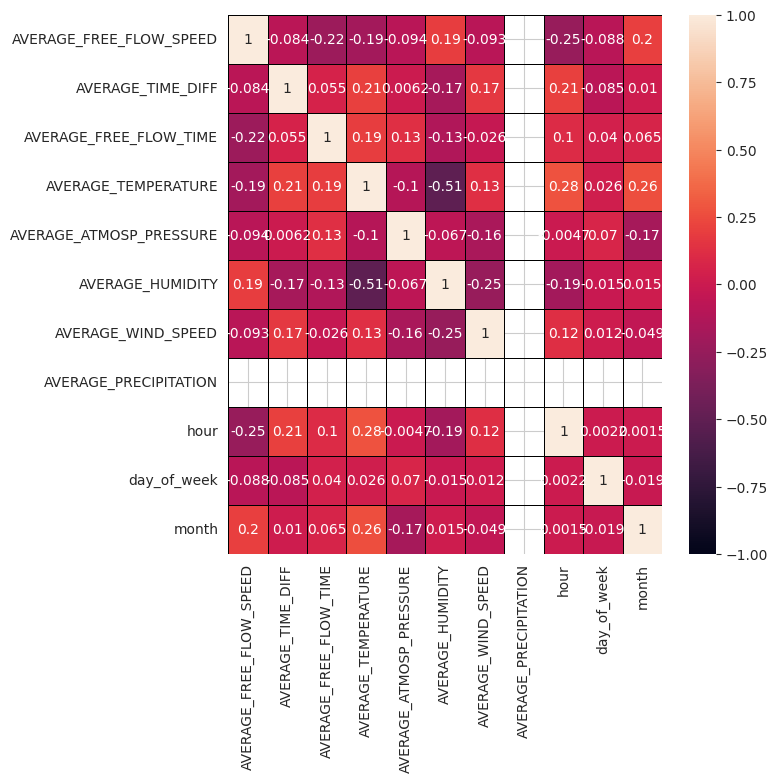

In [10]:
fig = plt.figure(figsize = (7, 7))
treino_corr = traffic_train.corr(method = 'pearson', numeric_only=True)
sns.heatmap(treino_corr, linecolor='black', linewidths=0.5, annot=True, vmax=1, vmin=-1)

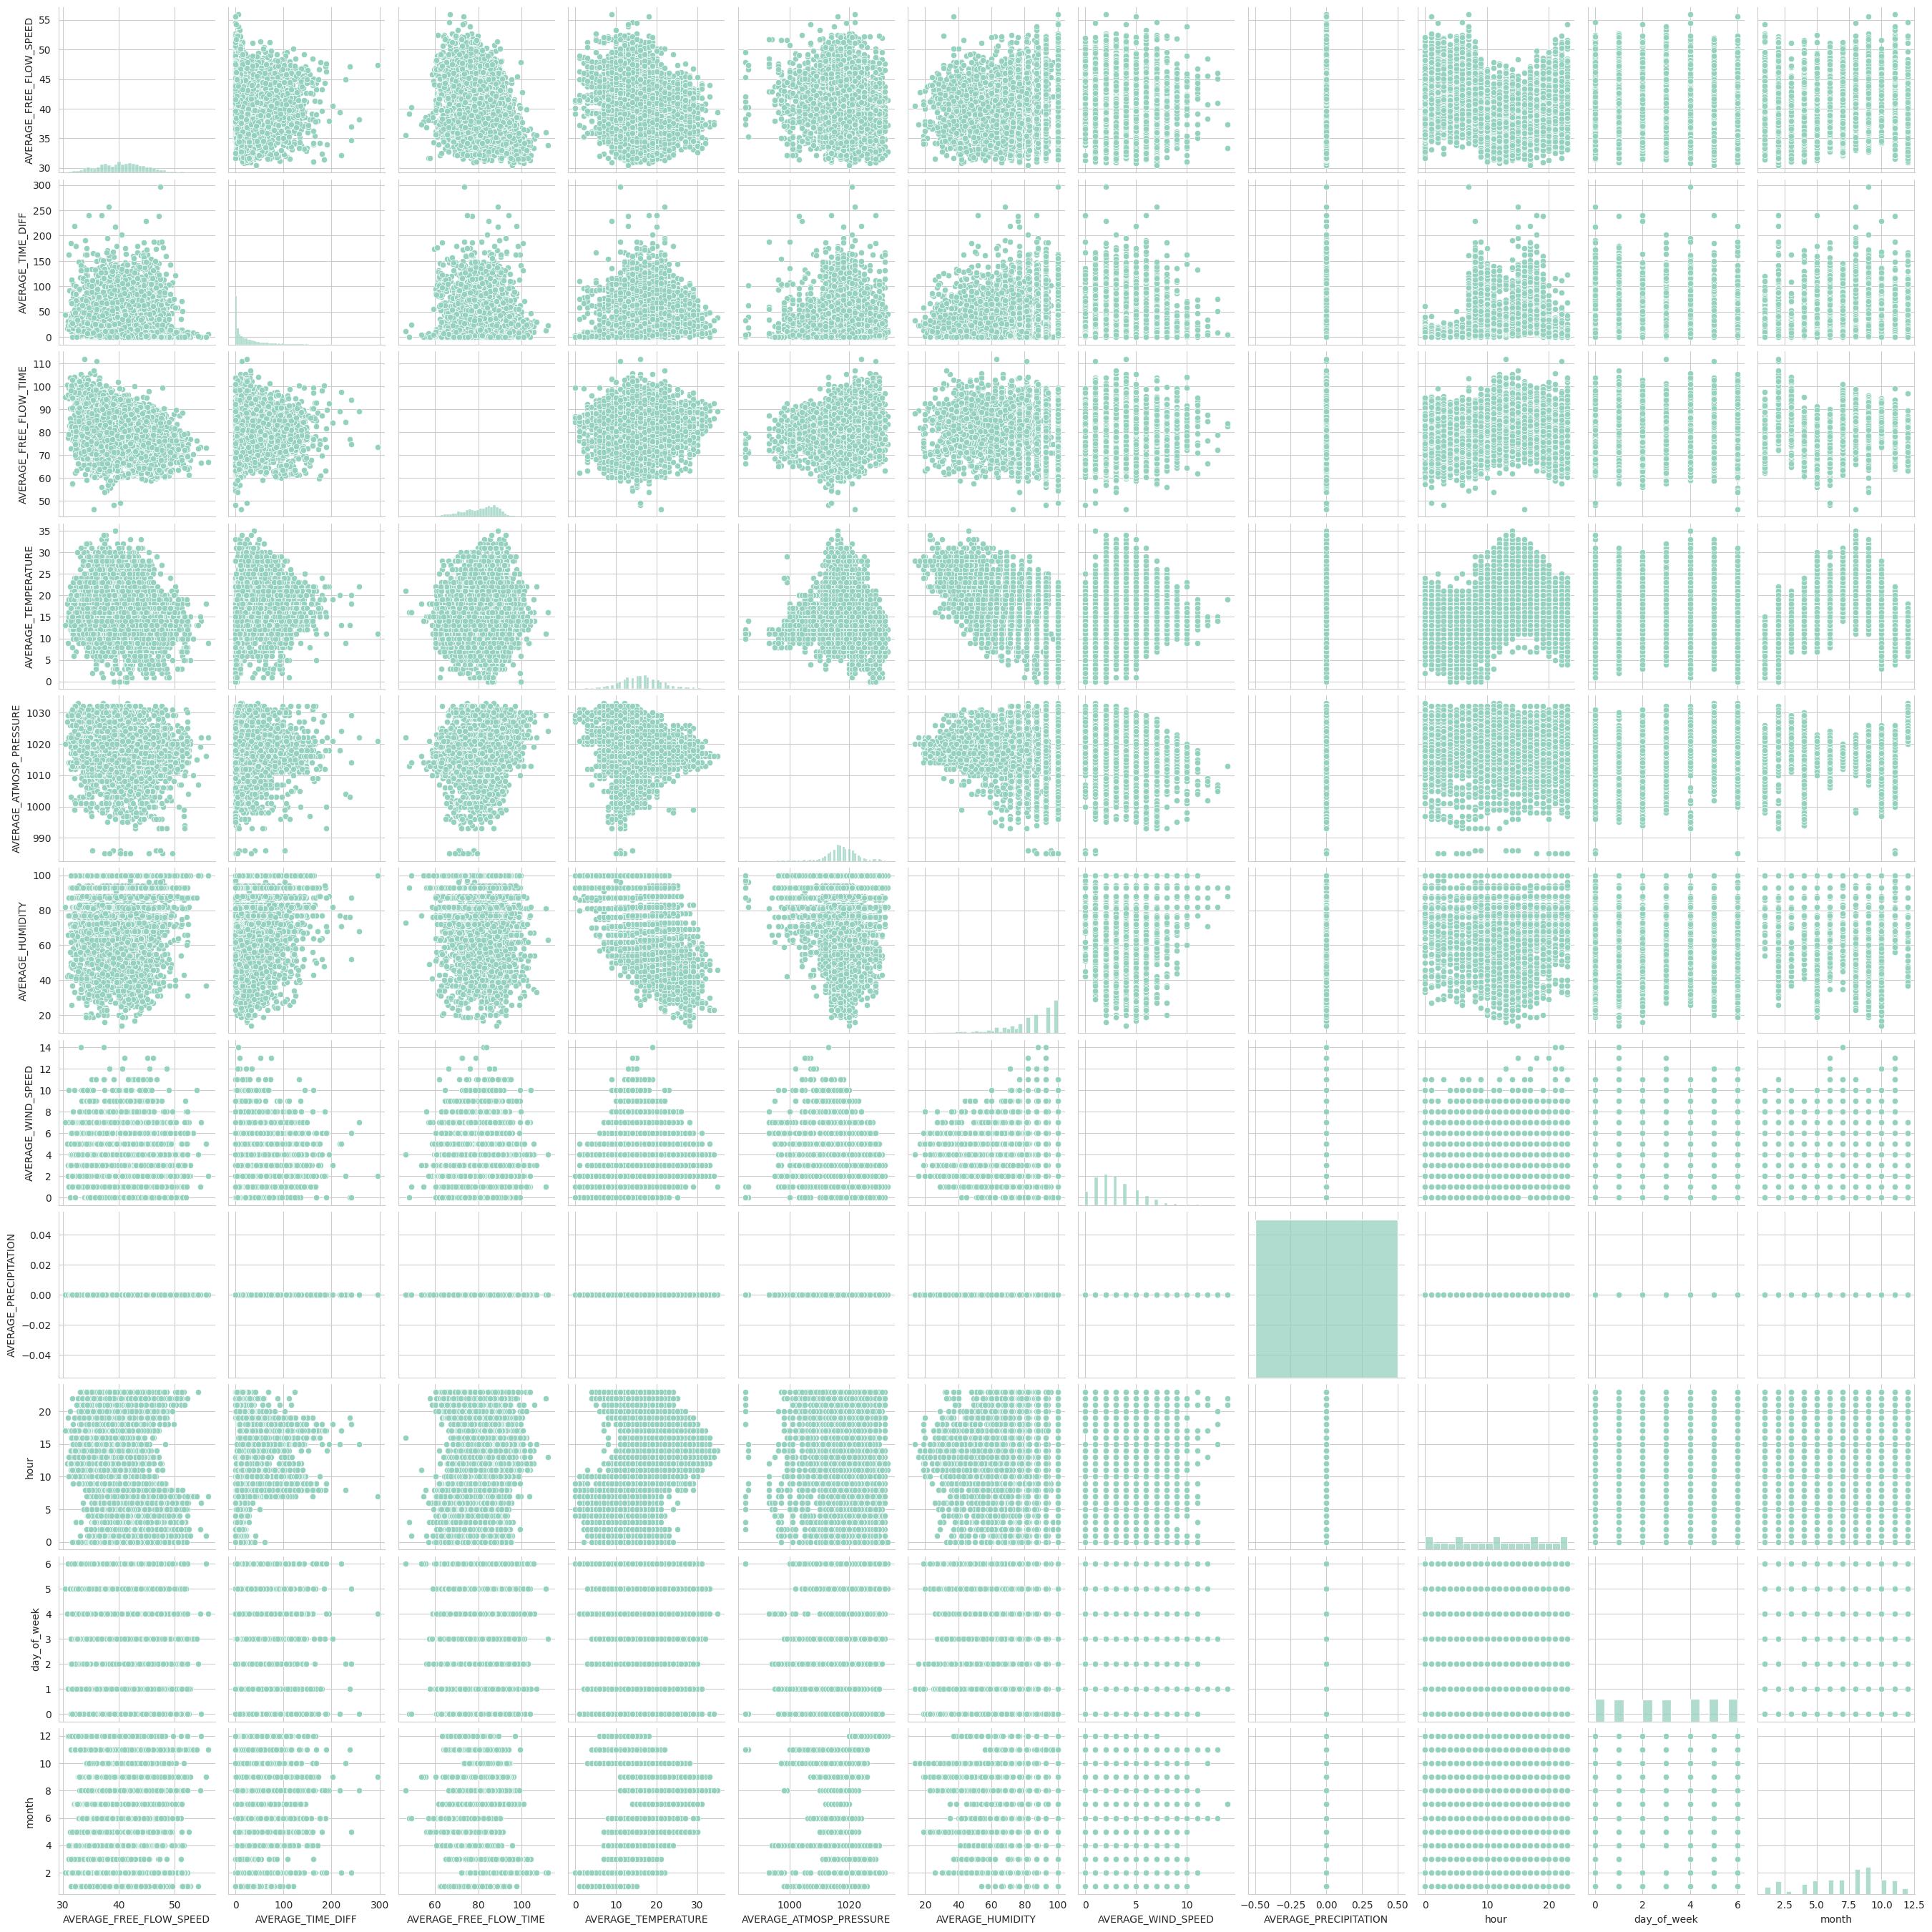

In [11]:
sns.pairplot(traffic_train)